In [ ]:
Implement the Image classification CNN model for classifying hand-written
MNIST dataset by dividing the model into following 4 stages:
a. Loading and preprocessing the image data
b. Defining the model's architecture
c. Training the model
d. Estimating the model's performance

In [1]:
# Step a: Loading and Preprocessing the Image Data
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt

In [2]:
# Load dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Reshape the data to add channel dimension (for CNN)
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

# Normalize the pixel values (0–255 → 0–1)
x_train = x_train / 255.0
x_test = x_test / 255.0

In [3]:
# Step b: Defining the Model's Architecture
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),  # 32 filters of 3x3
    MaxPooling2D(pool_size=(2, 2)),                                 # Downsample the image
    Conv2D(64, (3, 3), activation='relu'),                          # Another conv layer
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),                                                      # Flatten for dense layers
    Dense(128, activation='relu'),                                  # Fully connected layer
    Dense(10, activation='softmax')                                 # Output for 10 digits
])

C:\Users\Vaishnavi\AppData\Roaming\Python\Python313\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [4]:
# Step c: Training the Model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test))

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 36s 19ms/step - accuracy: 0.9616 - loss: 0.1261 - val_accuracy: 0.9817 - val_loss: 0.0572
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 40s 18ms/step - accuracy: 0.9866 - loss: 0.0422 - val_accuracy: 0.9883 - val_loss: 0.0347
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 36s 19ms/step - accuracy: 0.9905 - loss: 0.0285 - val_accuracy: 0.9903 - val_loss: 0.0307
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 45s 21ms/step - accuracy: 0.9937 - loss: 0.0196 - val_accuracy: 0.9918 - val_loss: 0.0279
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 31s 16ms/step - accuracy: 0.9946 - loss: 0.0163 - val_accuracy: 0.9916 - val_loss: 0.0322


In [5]:
# Step d: Estimating the Model's Performance
test_loss, test_acc = model.evaluate(x_test, y_test)
print("\nTest Accuracy:", test_acc)


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9916 - loss: 0.0322

Test Accuracy: 0.991599977016449


In [6]:
# Plot accuracy and loss
plt.figure(figsize=(12, 5))

<Figure size 1200x500 with 0 Axes>

<Figure size 1200x500 with 0 Axes>

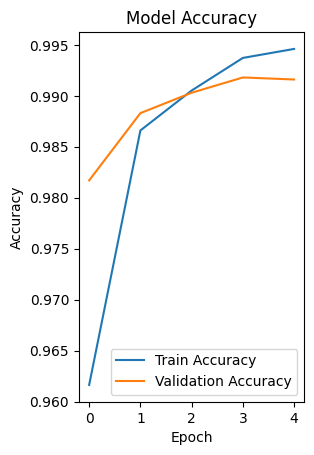

In [7]:
# Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

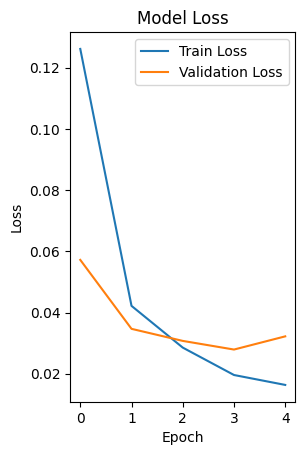

In [8]:
# Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()